In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from utils.helper import load_and_summarize, scale_dataframe

In [24]:
df_housing = load_and_summarize('CSV Files/Housing.csv')
df_housing

--- Loading Housing.csv ---
First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIn

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [25]:
print(f"Shape of the dataset: {df_housing.shape[0]} rows and {df_housing.shape[1]} columns.")
print(f"Unique bedroom counts: {df_housing['bedrooms'].unique()}")
print(f"Mean Area: {df_housing['area'].mean():.2f}")
print(f"Median Area: {df_housing['area'].median():.2f}")

Shape of the dataset: 545 rows and 13 columns.
Unique bedroom counts: [4 3 5 2 6 1]
Mean Area: 5150.54
Median Area: 4600.00


In [26]:
print("\n--- Checking for Missing Values ---")
print(df_housing.isnull().sum())
print("\nConclusion: The dataset is clean with no missing values.")


--- Checking for Missing Values ---
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Conclusion: The dataset is clean with no missing values.


In [27]:
df_processed = df_housing.copy() 

In [28]:
# We'll map 'yes'/'no' columns to 1s and 0s
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})

In [29]:
# For 'furnishingstatus', which has 3 categories, we can use a similar mapping.
df_processed['furnishingstatus'] = df_processed['furnishingstatus'].map({
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
})

In [30]:
print("First 5 rows of the processed DataFrame:")
print(df_processed.head())
print("\nData types after conversion:")
df_processed.info()

First 5 rows of the processed DataFrame:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4      


--- Visualizing Price vs. Area ---


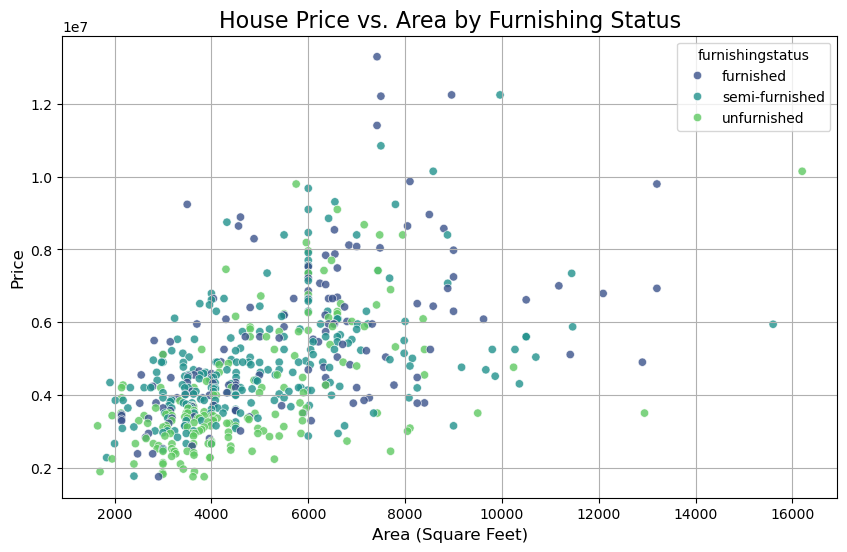

In [31]:
print("\n--- Visualizing Price vs. Area ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_housing, x='area', y='price', hue='furnishingstatus', palette='viridis', alpha=0.8)
plt.title('House Price vs. Area by Furnishing Status', fontsize=16)
plt.xlabel('Area (Square Feet)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.show()

In [32]:
print("\n--- Scaling All Features ---")
df_scaled = scale_dataframe(df_processed)
print("Scaled DataFrame head:")
print(df_scaled.head())


--- Scaling All Features ---
Scaled DataFrame head:
      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  1.000000  0.396564       0.6   0.333333  0.666667       1.0        0.0   
1  0.909091  0.502405       0.6   1.000000  1.000000       1.0        0.0   
2  0.909091  0.571134       0.4   0.333333  0.333333       1.0        0.0   
3  0.906061  0.402062       0.6   0.333333  0.333333       1.0        0.0   
4  0.836364  0.396564       0.6   0.000000  0.333333       1.0        1.0   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0       0.0              0.0              1.0  0.666667       1.0   
1       0.0              0.0              1.0  1.000000       0.0   
2       1.0              0.0              0.0  0.666667       1.0   
3       1.0              0.0              1.0  1.000000       1.0   
4       1.0              0.0              1.0  0.666667       0.0   

   furnishingstatus  
0               1.0  
1               1.0  
2  

In [33]:
# Finally, we'll save this fully preprocessed data to a new CSV.
output_path = 'CSV Files/processed_housing_data.csv'
df_scaled.to_csv(output_path, index=False)
print(f"\n✅ Success! Processed data has been saved to '{output_path}'")


✅ Success! Processed data has been saved to 'CSV Files/processed_housing_data.csv'
